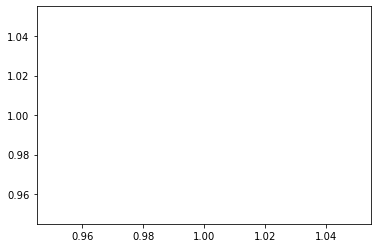

In [1]:
import matplotlib.pyplot as plt
plt.plot(1,1)

In [9]:
import torch
import torch.nn as nn

class LR(nn.Module):
    def __init__(self,in_size,out_size):
        super(LR,self).__init__()
        self.linear = nn.Linear(in_size,out_size)
        
    def forward(self,x):
        return self.linear(x)

In [20]:
from torch.utils.data import Dataset, DataLoader

class Data2D(Dataset):
    def __init__(self, y_validate_var=None):
        self.x = torch.zeros(50,2)
        self.x[:,0] = torch.arange(-2,3,0.1)
        self.x[:,1] = torch.arange(-1,4,0.1)
        self.w_f = torch.tensor([[-0.83,0.3],[0.4,-0.5]])
        self.b_f = torch.tensor([[0.9,-0.8]])
        self.f = torch.mm(self.x,self.w_f) + self.b_f
        self.y = self.f + 0.4 * torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]
        if y_validate_var is not None:
            self.y = self.f + y_validate_var * torch.randn((self.x.shape[0],1))
    
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [14]:
from torch import optim

data = Data2D()
criterion = nn.MSELoss()
trainloader = DataLoader(dataset=data, batch_size=5)
model = LR(in_size=2, out_size=2)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01)

In [18]:
from statistics import mean 
Loss = []

for epoch in range(5):
    for x,y in trainloader:
        y_hat = model(x)
        loss = criterion(y_hat,y)
        Loss.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    Cost = mean(Loss)
    print(f"Epoch {epoch} Cost: {Cost}")

Epoch 0 Cost: 2.553578817844391
Epoch 1 Cost: 2.2844720840454102
Epoch 2 Cost: 2.0486187001069385
Epoch 3 Cost: 1.8428387761116027
Epoch 4 Cost: 1.6639378261566162


In [22]:
valData = Data2D(y_validate_var=0.5)

In [24]:
weight_decay = [0.01, 0.05, 0.1]

for i, wd in enumerate(weight_decay):
    model = LR(2,2)
    optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=wd)
    
    for epoch in range(5):
        train_loss = []
        for x,y in trainloader:
            y_hat = model(x)
            loss = criterion(y_hat,y)
            train_loss.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        train_cost = mean(train_loss)
        yhat_val_predict = model(valData.x)
        val_loss = criterion(yhat_val_predict,valData.y)
        print(f"weight_decay: {wd} epoch: {epoch} train_cost: {train_cost} val_loss: {val_loss}")

weight_decay: 0.01 epoch: 0 train_cost: 1.8249959170818328 val_loss: 1.7239489555358887
weight_decay: 0.01 epoch: 1 train_cost: 1.3221336632966996 val_loss: 1.303238034248352
weight_decay: 0.01 epoch: 2 train_cost: 0.9888609608635306 val_loss: 1.0174896717071533
weight_decay: 0.01 epoch: 3 train_cost: 0.7780879180878401 val_loss: 0.8403263092041016
weight_decay: 0.01 epoch: 4 train_cost: 0.6488639906048774 val_loss: 0.7312026023864746
weight_decay: 0.05 epoch: 0 train_cost: 0.9194390058517456 val_loss: 0.9155962467193604
weight_decay: 0.05 epoch: 1 train_cost: 0.6278515189886094 val_loss: 0.6892339587211609
weight_decay: 0.05 epoch: 2 train_cost: 0.4552434101700783 val_loss: 0.539667010307312
weight_decay: 0.05 epoch: 3 train_cost: 0.3533885322511196 val_loss: 0.45114216208457947
weight_decay: 0.05 epoch: 4 train_cost: 0.2956786207854748 val_loss: 0.3992847800254822
weight_decay: 0.1 epoch: 0 train_cost: 3.0836119025945665 val_loss: 2.8457512855529785
weight_decay: 0.1 epoch: 1 train_c